<a href="https://www.kaggle.com/code/wonduk/eda-on-top100-youtube-channel-dataset?scriptVersionId=159636193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #FF4500; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">🖥 Top100 YouTube Channels</div>

![image](https://static.vecteezy.com/system/resources/previews/003/206/623/original/youtube-editorial-app-icon-free-vector.jpg)

## <div style="text-align: left; background-color: #F75D59; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">🖥 About YouTube</div>

<h3 style='font-family: Times New Roman'>
    
YouTube is an American online video sharing and social media platform headquartered in San Bruno, California. <br><br>
It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. Owned by Google, it is the second most visited website, <br><br>
right after Google itself. YouTube has more than one billion monthly users who collectively watch more than one billion hours of videos each day. <br><br>
As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.
    
</h3>

## <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">📁 About Dataset<div>
    
<h3 style='font-family: Times New Roman'>
    
The dataset 'Top100 youtube channel' contains 7 columns, each are:
    </h3>
    
    
*  (1)<b>rank</b>:           rank of youtuber (sorted by subscribers)
    
*  (2)<b>youtuber</b>:      name of youtuber
    
*  (3)<b>subscribers</b>:   number of subscribers
    
*  (4)<b>video views</b>:   total views of video
    
*  (5)<b>video count</b>:   number of uploaded videos
    
*  (6)<b>category</b>:      category of video
    
*  (7)<b>started</b>:       started year 

<a id="1"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Loading necessary libraries and dataset</div>

<h4>Load necessary libraries, and read dataset</h4>

In [1]:
# data
import pandas as pd
import numpy as np


#For Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from math import pi
from wordcloud import WordCloud


#Set Option
pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

color_scheme = px.colors.sequential.Peach

<b>color scheme</b>: <br><br>
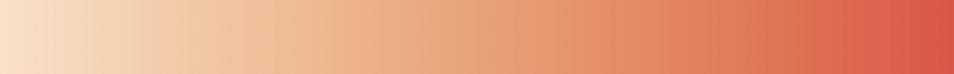

read <b>csv file</b>:

In [2]:
df = pd.read_csv('../input/top-youtube-channels-data/most_subscribed_youtube_channels.csv')[:100]

In [3]:
print(df.shape)
df.head(3)

(100, 7)


,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006


<b>We can see that there's 5 numeric columns and 2 categorical columns in the dataset.</b>

<a id="1.1"></a>
## <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">1.1. Convert type of columns</div>


<h4>Since there's some missing values on column 'category',i decided to drop it.</h4>

In [4]:
f_col = ['subscribers','video count','video views']


df['video views'] = df['video views'].astype(str).apply(lambda x:x.replace(',',''))
df['video count'] = df['video count'].astype(str).apply(lambda x:x.replace(',',''))
df['subscribers'] = df['subscribers'].astype(str).apply(lambda x:x.replace(',',''))

df['video views'] = df['video views'].astype('int64')
df['video count'] = df['video count'].astype('int64')
df['subscribers'] = df['subscribers'].astype('int64')



df[f_col] = df[f_col].astype(float)

df.drop('rank',axis=1,inplace=True)

df = df.dropna().reset_index()
df.drop('index',axis=1, inplace=True)

<b> and also drop year: 1970</b>

In [5]:
df.drop(np.where(df['started'] == 1970)[0][0],inplace=True)

Text(0.5, 1.0, 'Distribution of missing values')

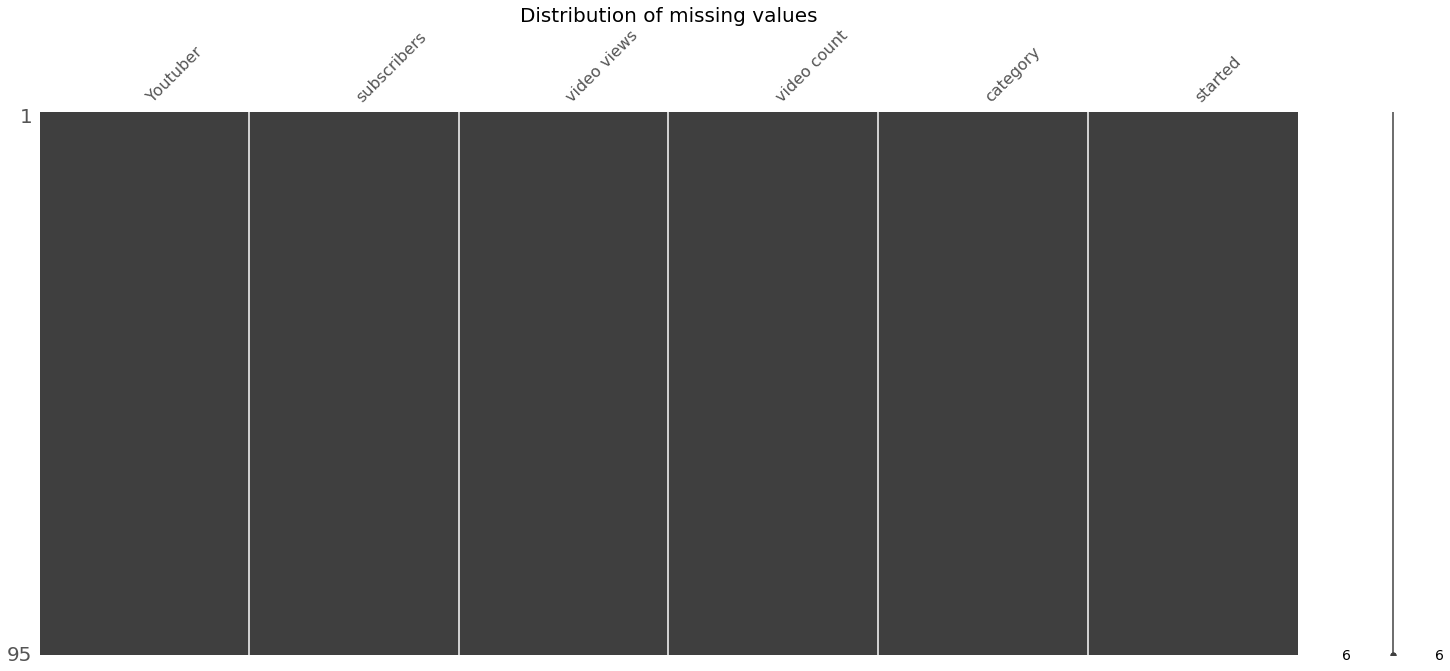

In [6]:
msno.matrix(df)
plt.title('Distribution of missing values', fontsize = 20)

<b> Dropped successfully</b>

<a id="2"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">2. Explore Each Columns</div>

<h4> Explore each columns in the dataset to see the distributions of data.</h4>

<a id="2.1"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.1. Started Year of Top 100 Youtube Channel</div>

Text(0.5, 1.0, 'Started Year of Top 100 Youtube Channel')

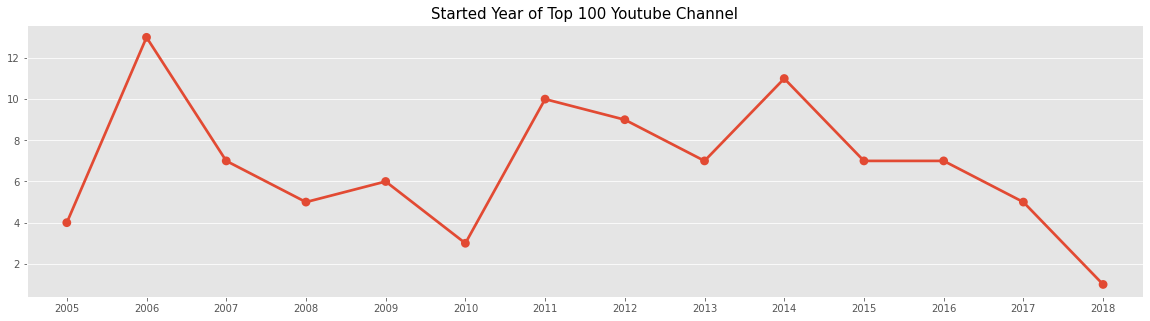

In [7]:
year = df['started'].value_counts()
plt.figure(figsize=(20,5))
sns.pointplot(x=year.index, y=year.values).set_title('Started Year of Top 100 Youtube Channel',fontsize=15)

<b>Start year of Top100 youtube channels are mainly distributed in 2006 and early 2010s.</b>

<a id="2.2"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.2. Categories of Top 100 Youtube Channel</div>

In [8]:
category = df['category'].value_counts()
fig = px.pie(values=category.values, 
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Peach)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

<b>Music, entertainment and People & Blogs ranked top 3 higest percentage of category proportion.</b>

<a id="2.3"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">2.3. Boxplot on (1)Video Views & (2)Video Counts & (3)Subscribers</div>

In [9]:
fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text="Boxplot of video views & vide count & subscribers",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['video views'],
                    name="video views boxplot",
                    boxpoints='outliers', 
                    marker_color=color_scheme[6],
                    line_color=color_scheme[3]),row=1,col=1)

fig.add_trace(go.Box(y=df['video count'],
                     name="video count boxplot",
                     boxpoints='outliers', 
                     marker_color=color_scheme[6],
                     line_color=color_scheme[4]),row=1,col=2)

fig.add_trace(go.Box(y=df['subscribers'],
                    name="subscribers boxplot",
                    boxpoints='outliers', 
                    marker_color=color_scheme[6],
                    line_color=color_scheme[5]),row=1,col=3)

fig.update_layout(template = 'ggplot2')

<a id="3"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Category Analysis</div>

<h4>Analysis on Features by Category</h4>

<a id="3.1"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.1. Mean Subscribers by category</div>

In [10]:
categories = df.groupby('category').mean().subscribers.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index, 
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence=color_scheme,
                            title='Mean Subscribers by Category',
                            template = 'ggplot2',
                            text = np.round(categories.values/1000000,2),
                            height=500))

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"


fig.update_layout(
    xaxis_title="Category",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

<b>As shown above, we can see that Sports, Shows and Film & Animation categories ranked top 3 mean of subscribers.</b>

<a id="3.2"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family:Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.2. Categories with Video Views & Video Counts</div>

<h4> In this section, used two types of visualization (Strip plots & Scatter plot),<br><br>
    The former is used to explore the distribution of each category with two features respectively, and the latter is used for trivariate analysis</h4>.

<a id="3.2.1"></a>
### <b>3.2.1.Strip plots</b>

define stripplot

In [11]:
def stplot(data, xcol, ycol, huecol, axs, title):
    sns.stripplot(data = data, x = xcol, y = ycol, 
                  hue = huecol, edgecolor = 'red', ax = axs).set_title(title, fontsize = 20)
    axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title1 = 'categories with video views'
title2 = 'categories with video counts'

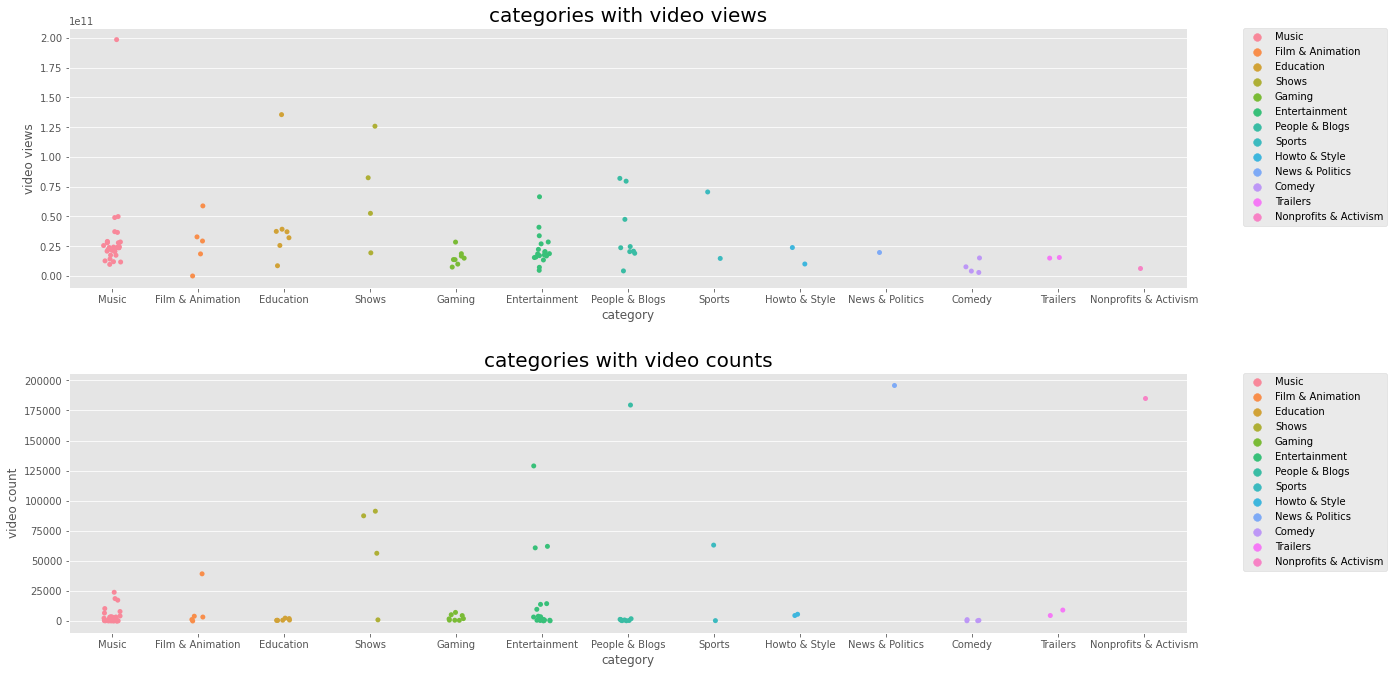

In [12]:
fig, ((ax1),(ax2)) = plt.subplots(ncols=1,nrows=2)
fig.set_size_inches(20,10)
stplot(df,'category', 'video views', 'category', ax1, title1)
stplot(df,'category', 'video count', 'category', ax2, title2)
fig.tight_layout(pad=3.0)

<b>Shows distribution of each categories on video views and video counts</b>

<a id="3.2.2"></a>
### <b>3.2.2. Scatter plot</b>

In [13]:
fig = px.scatter(df, x="video count", y="video views",
                 size="video views", color="category",
                 log_x=True, size_max=60,
                 title="categories with video views and video counts",
                 template = 'ggplot2')

lst = [5,6]
for idx in lst:
    fig.data[idx].marker.line.width = 5
    fig.data[idx].marker.line.color = 'black'
fig.show()

One can found that category of <b style = 'color:skyblue'>'People and Blogs'</b> &<b style= 'color:orange'> Entertainment</b>  has high video counts, while low video views relatively.

<a id="3.3"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.3. Categories (2013 to 2018)</div>

<h4>Barplot on count of categories: 2013 to 2018</h4>

In [14]:
def barplot(x, y, axs, palette, title):
    ax = sns.barplot(x = x, y = y, hue = x, palette = palette, dodge=False, ax=axs)
    for num in range(len(y)):
        ax.bar_label(ax.containers[num])
    ax.set_title(title)
    return ax

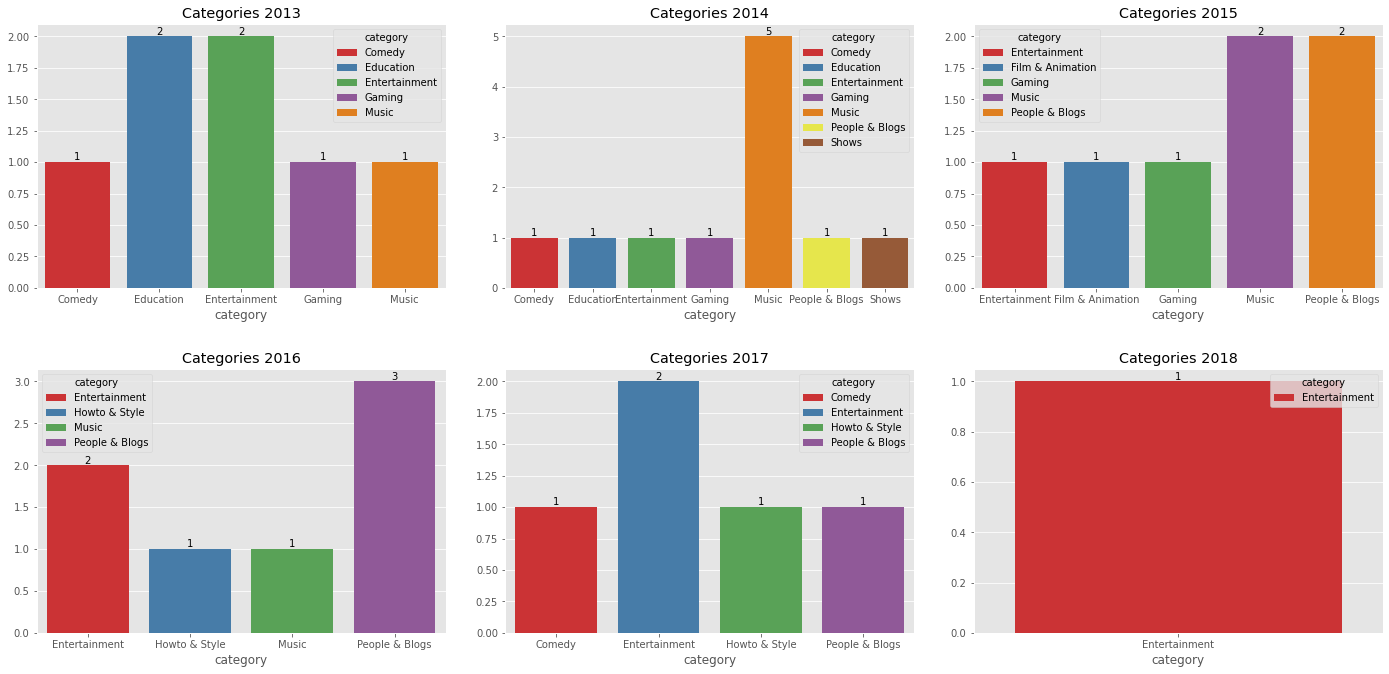

In [15]:
y_2013 = df[df['started']==2013].groupby('category').size()
y_2014 = df[df['started']==2014].groupby('category').size()
y_2015 = df[df['started']==2015].groupby('category').size()
y_2016 = df[df['started']==2016].groupby('category').size()
y_2017 = df[df['started']==2017].groupby('category').size()
y_2018 = df[df['started']==2018].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(20,10)
barplot(y_2013.index, y_2013.values, ax1, 'Set1', 'Categories 2013')
barplot(y_2014.index, y_2014.values, ax2, 'Set1', 'Categories 2014')
barplot(y_2015.index, y_2015.values, ax3, 'Set1', 'Categories 2015')
barplot(y_2016.index, y_2016.values, ax4, 'Set1', 'Categories 2016')
barplot(y_2017.index, y_2017.values, ax5, 'Set1', 'Categories 2017')
barplot(y_2018.index, y_2018.values, ax6, 'Set1', 'Categories 2018')

fig.tight_layout(pad=3.0)

<a id="3.4"></a>
## <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.4. Categories (2005 to 2010)</div>

<h4>Barplot on count of categories: 2005 to 2010

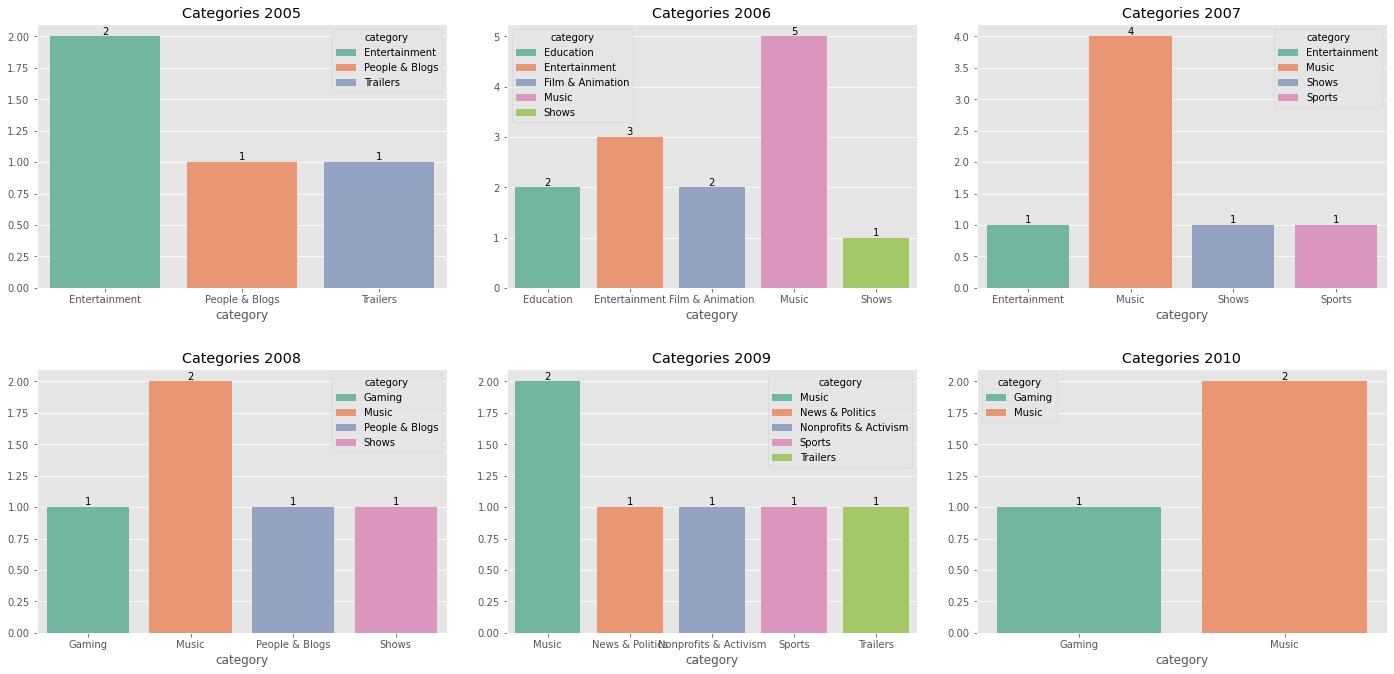

In [16]:
y_2005 = df[df['started']==2005].groupby('category').size()
y_2006 = df[df['started']==2006].groupby('category').size()
y_2007 = df[df['started']==2007].groupby('category').size()
y_2008 = df[df['started']==2008].groupby('category').size()
y_2009 = df[df['started']==2009].groupby('category').size()
y_2010 = df[df['started']==2010].groupby('category').size()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(20,10)
barplot(y_2005.index, y_2005.values, ax1,  'Set2', 'Categories 2005')
barplot(y_2006.index, y_2006.values, ax2,  'Set2', 'Categories 2006')
barplot(y_2007.index, y_2007.values, ax3,  'Set2', 'Categories 2007')
barplot(y_2008.index, y_2008.values, ax4,  'Set2', 'Categories 2008')
barplot(y_2009.index, y_2009.values, ax5,  'Set2', 'Categories 2009')
barplot(y_2010.index, y_2010.values, ax6,  'Set2', 'Categories 2010')

fig.tight_layout(pad=3.0)

<a id="3.5"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">3.5. Youtuber with Most Subscribers by Each Category</div>

<h4> Explore youtueber with most subscribers by catgory in the section.</h4>

<a id="3.5.1"></a>
### <b>3.5.1. Treemap</b>

In [17]:
a = df.groupby(['category'])['subscribers'].max()

most = df[df['subscribers'].isin(a.values)]

# plt.figure(figsize=(10,5))
fig = px.treemap(most, 
                 path=['category','Youtuber'],
                 values='subscribers', 
                 title = ' Youtuber with most subscribers in each category',
                 color_discrete_sequence= color_scheme,
                 width=1500, height=700)
fig.update_layout(template = 'ggplot2')
fig.show()

<b> And bar chart below</b>

<a id="3.5.2"></a>
### <b>3.5.2. bar chart</b>

In [18]:
fig = go.Figure(data=px.bar(x=most.category, 
                            y=most.subscribers,
                            text = most.Youtuber, 
                            orientation='v',
                            color=most.category,
                            color_discrete_sequence=px.colors.sequential.Sunsetdark,
                            title='Youtuber with most susbcribers in eacy categories',                            
                            height=600))

fig.add_layout_image(
    source= 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9qVrPrIA_q1Ou0Izvhx7t2XQb2Qh9QvUKGw&usqp=CAU',
    xref="x domain",
    yref="y domain",
    x=1,
    y=1,
    xanchor="right",
    yanchor="top",
    sizex=0.4,
    sizey=0.4,
    )

fig.update_layout(template = 'ggplot2')

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Susbscribers",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

<b> Easily seen that music, education, Film & Animation are top3 categories that have most subscribers.<br><br>
    Includes: <mark>T-Series</mark>, <mark>YouTube Movies</mark> and <mark>Cocomelon - Nuresery Rhymes </mark></b>

<a id="4"></a>
# <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">4. Top 5 youtubers analysis</div>

<h4> Explore top 5 youtubers by each features. </h4>

<a id="4.1"></a>
##  <div style="text-align: left; background-color: #F75D59; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:10px">4.1. Top 5 Youtubers with (1)subscribers (2)Video Views (3)Video Counts</div>

define barplot function below:

In [19]:
def barplt(x, y, data, palette, axs, title):
    ax = sns.barplot(x=x, 
            y=y, 
            hue = x,
            data=data,
            dodge=False,    
            palette=palette,ax=axs).set_title(title)

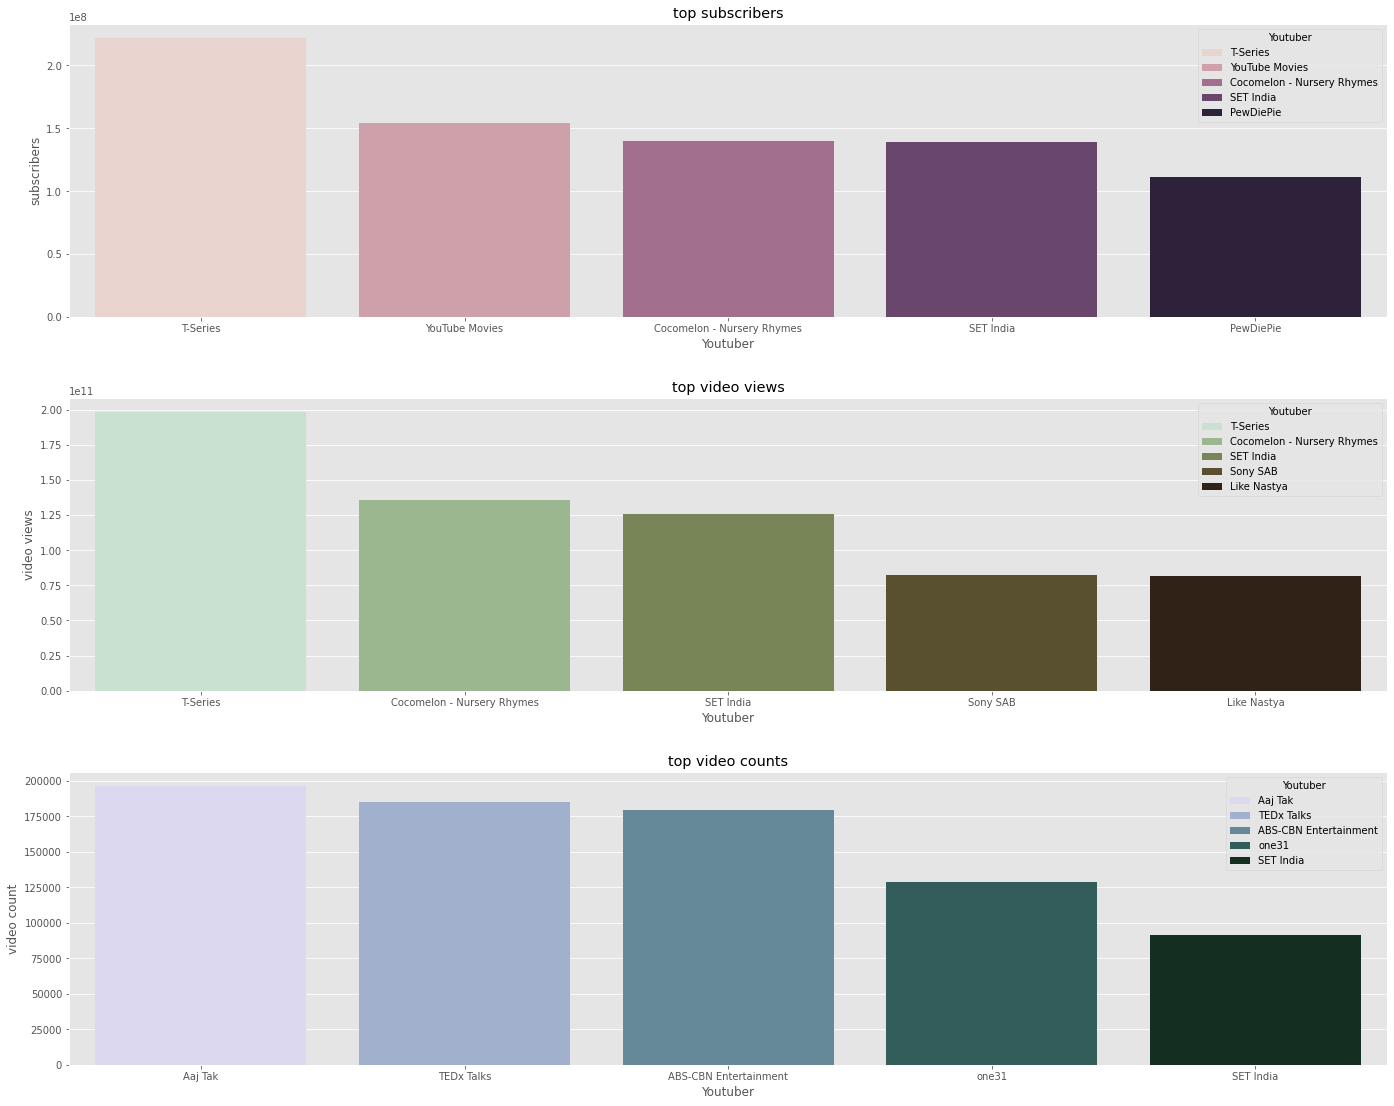

In [20]:
subscribers_sorted = df.sort_values('subscribers',ascending=False)
subscribers_sorted = subscribers_sorted[:5]

video_views_sorted = df.sort_values('video views',ascending=False)
video_views_sorted = video_views_sorted[:5]

video_counts_sorted = df.sort_values('video count',ascending=False)
video_counts_sorted = video_counts_sorted[:5]

fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols=1,nrows=3)
fig.set_size_inches(20,16)

barplt("Youtuber","subscribers",subscribers_sorted,"ch:30",ax1,'top subscribers')
barplt("Youtuber","video views",video_views_sorted,"ch:25",ax2,'top video views')
barplt("Youtuber","video count",video_counts_sorted,"ch:20",ax3,'top video counts')

fig.tight_layout(pad=3.0)

<a id="5"></a>
## <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">5. Start Year Analysis</div>

<h4>Column 'Start Year' is also an important feature in the dataset, thus, explore start year by 3 numeric columns in this section.

In [21]:
def ptplot(data, xcol, ycol, colors, axs, titles):
    sns.pointplot(data = data, x = xcol, y = ycol,
                  color = colors, ax = axs).set_title(titles)

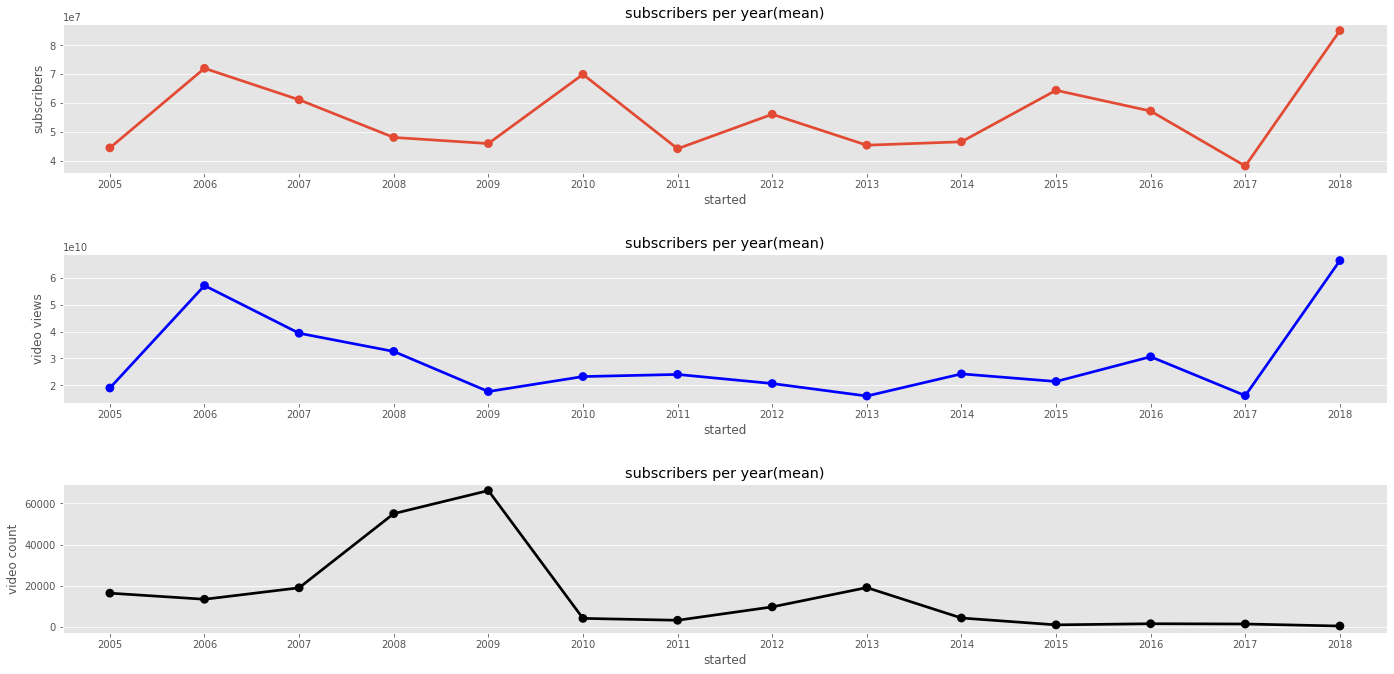

In [22]:
year_sub = df.groupby('started').mean().reset_index()
fig, ((ax1),(ax2),(ax3)) = plt.subplots(ncols=1,nrows=3)
fig.set_size_inches(20,10)

ptplot(year_sub, 'started', 'subscribers', None, ax1, 'subscribers per year(mean)')
ptplot(year_sub, 'started', 'video views', 'blue', ax2, 'subscribers per year(mean)')
ptplot(year_sub, 'started', 'video count', 'black', ax3, 'subscribers per year(mean)')

fig.tight_layout(pad=3.0)


> <b>Subscribers per year:</b><br><br>
    With the exception of <mark>2018 year</mark>, subscribers per year was higher before 2010.  <br>
    We can guess that this is due to the <mark>accumulation of time</mark>. <br>
while 2018 has the highest number of subscribers, this is due to the fact that there's only sole data of 2018.<br>


<a id="6"></a>
## <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">6. Regplot on Subscribers & Video Views & Video Counts</div>

<h4> regression plot on columns 'Subscribers', 'Video Views' and 'Video Counts'.

Text(0.5, 1.0, 'Video Views with Video Counts')

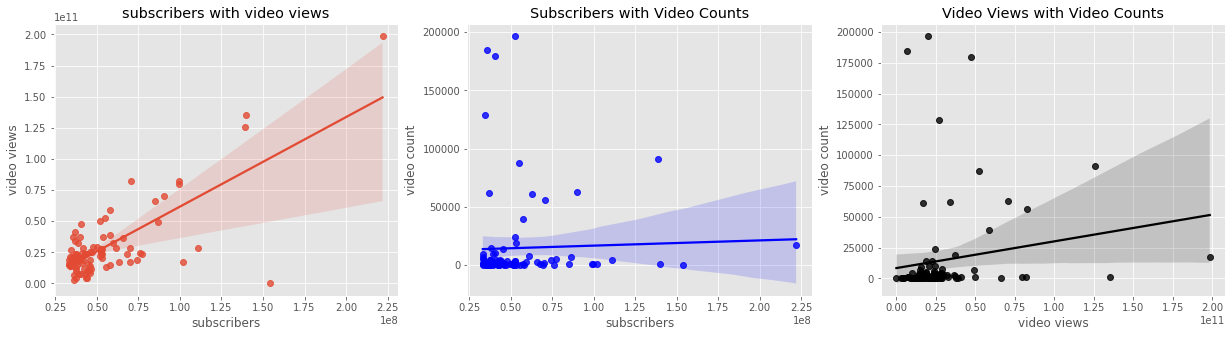

In [23]:
fig, ((ax1,ax2,ax3)) = plt.subplots(ncols=3,nrows=1)
fig.set_size_inches(21,5)

sns.regplot(x=df['subscribers'],
                y=df['video views'],
                ax=ax1).set_title('subscribers with video views')
sns.regplot(x=df['subscribers'],
                y=df['video count'],
                ax=ax2,
                color='blue').set_title('Subscribers with Video Counts')
sns.regplot(x=df['video views'],
                y=df['video count'],
                ax=ax3,
                color='black').set_title('Video Views with Video Counts')

<b>Let's see correlation heatmap below in the next section</b>

<a id="7"></a>
## <div style="text-align: center; background-color: #FF4500; font-family: Times New Roman; color: white; padding: 14px; line-height: 1;border-radius:20px">7. Correlation heatmap</div>

<AxesSubplot:>

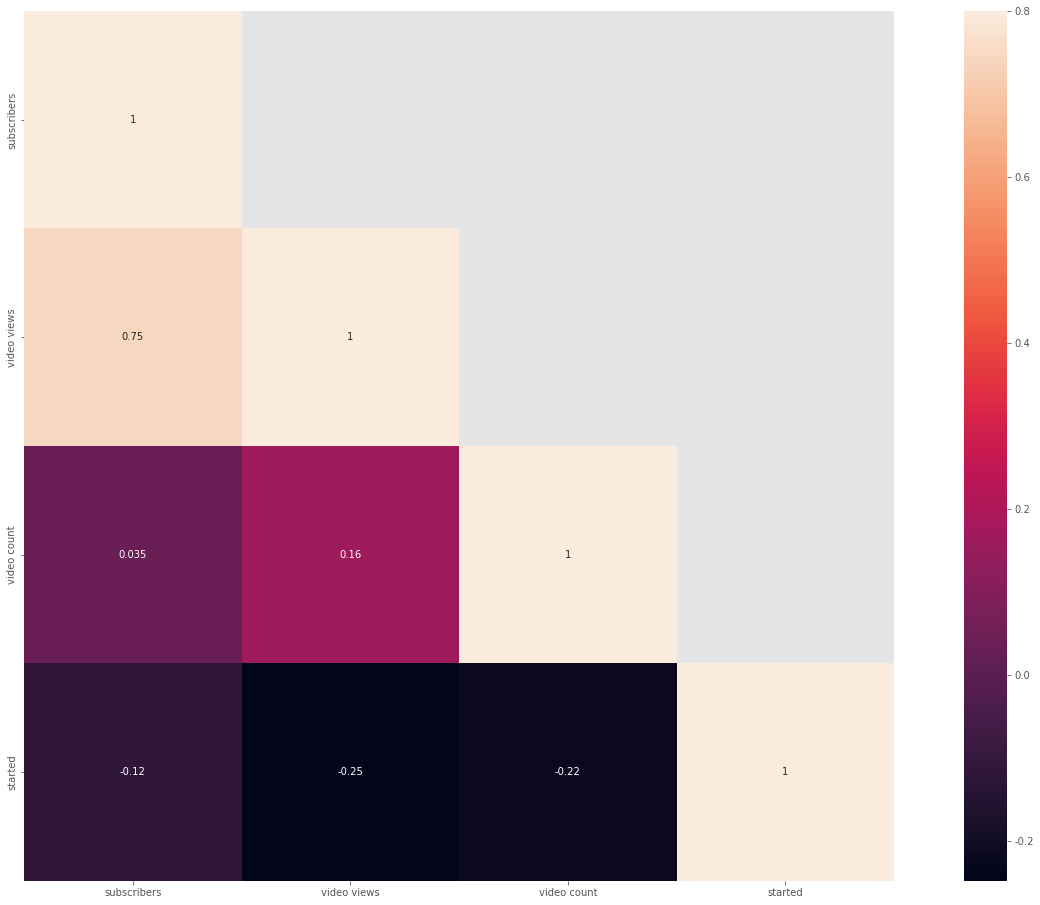

In [24]:
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots() 
fig.set_size_inches(25,16)
sns.heatmap(df.corr(), mask = mask, vmax =.8, square = True, annot = True)

<b> We can notice that there's high correlation 0.82 with subscribers and video views</b>